Shape of dataframe before dropping nullvalues- (418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Shape of dataframe before dropping nullvalues- (891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Count of missing values in each columns in test data- PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Count of missing values in each columns in train data- PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Mean for column-Pass

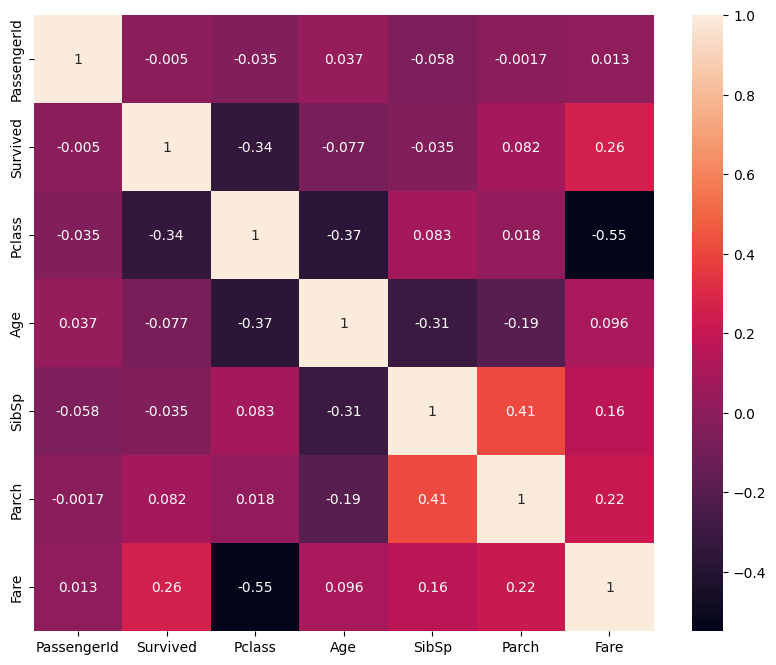

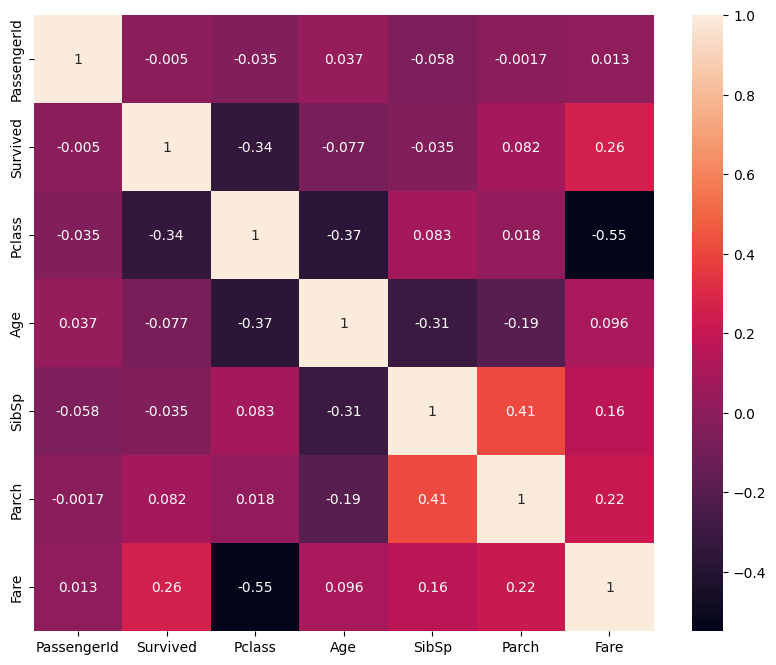

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


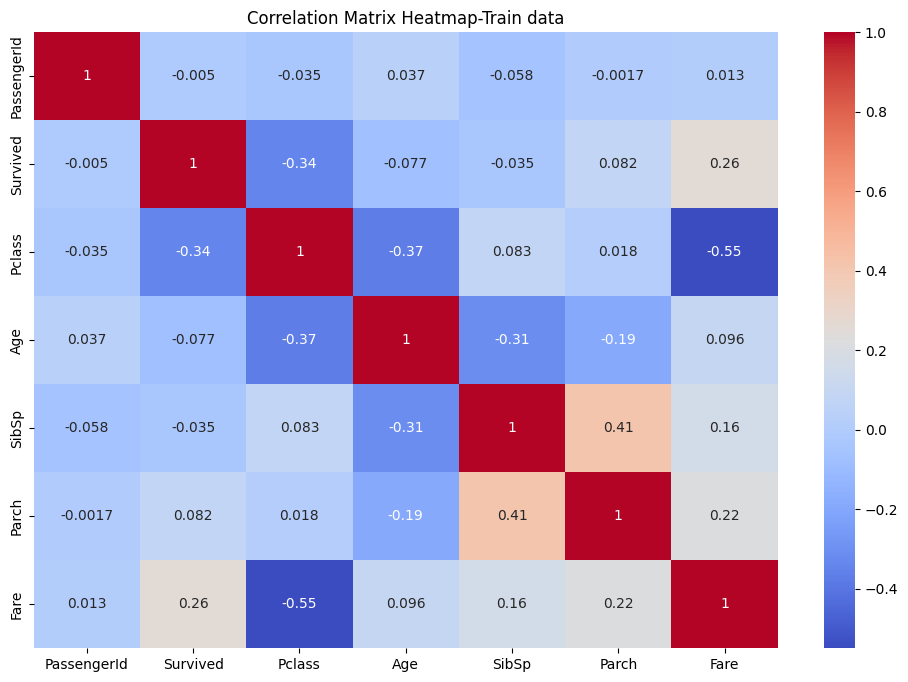

Shape of dataframe before dropping nullvalues- (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [1]:
#1. Data Exploration:
#a. Load the dataset and perform exploratory data analysis (EDA).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_test = pd.read_csv(
    "/content/sample_data/Titanic_test.csv")
print("Shape of dataframe before dropping nullvalues-",df_test.shape)
print(df_test.columns)
df_train = pd.read_csv(
    "/content/sample_data/Titanic_train.csv")
print("Shape of dataframe before dropping nullvalues-",df_train.shape)
print(df_train.columns)
#Count of missing values in each column
print("Count of missing values in each columns in test data-",df_test.isnull().sum())
print("Count of missing values in each columns in train data-",df_train.isnull().sum())

#b. Examine the features, their types, and summary statistics.
# 3.	Calculate the mean, median, mode, and standard deviation for these columns.
#Train
df_numeric_train= df_train.select_dtypes(include=['int64', 'float64'])
colcount = len(df_numeric_train.columns)

for i in range(0, colcount):
    colname = df_numeric_train.columns[i]
    # Mean
    mean = df_numeric_train[colname].mean(axis=0) #axis=0 means the operation is performed column-wise (down the rows).
    print(f'Mean for column-{colname} is: {mean}')
    # Median
    median = df_numeric_train[colname].median(axis=0)
    print(f'Median for column-{colname} is: {median}')

    # Standard Deviation
    stddeviation = df_numeric_train[colname].std(axis=0)
    print(f'std deviation for column-{colname} is: {stddeviation}')

    # Mode
    mode = df_numeric_train[colname].mode()[0]
    print(f'mode for column-{colname} is: {mode}')

    #IQR
    Q1 = df_numeric_train[colname].quantile(0.25)
    Q3 = df_numeric_train[colname].quantile(0.75)
    IQR = Q3 - Q1
    print("Interquartile Range (IQR) for column '%s': %s" % (colname, IQR))
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
 #Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
#Train
z=df_numeric_train.corr(numeric_only= True)
# Adjust the figure size
plt.figure(figsize=(10, 8))  # Width: 10, Height: 8
# Create the heatmap
sns.heatmap(z, annot=True)
# Show the plot
plt.show()

#4.	Pattern Recognition and Insights-Test
 #Identify any correlations between variables and discuss their potential implications.
 #Look for trends or patterns over time if temporal data is available.
# Calculate the correlation matrix
#Train
z=df_numeric_train.corr(numeric_only= True)
# Adjust the figure size
plt.figure(figsize=(10, 8))  # Width: 10, Height: 8
# Create the heatmap
sns.heatmap(z, annot=True)
# Show the plot
plt.show()

#Pattern Recognition and Insights-Train
 #Identify any correlations between variables and discuss their potential implications.
 #Look for trends or patterns over time if temporal data is available.
# Calculate the correlation matrix
correlation_matrix = df_numeric_train.corr()
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap-Train data')
plt.show()
#Following are some of the insights through correlation:
# Positive Correlation:have positive relationship (as one variable increases, so does the other).
#2. Data Preprocessing:
#a. Handle missing values (e.g., imputation).
df_cleaned_train = df_train.dropna().copy()
print("Shape of dataframe before dropping nullvalues-",df_train.shape)
 #Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df_cleaned_train.columns
df_cleaned_train


In [2]:
# Impute missing values for 'Age' and 'Embarked' in the training dataset
age_median_train = df_train['Age'].median()
df_train['Age'].fillna(age_median_train, inplace=True)

embarked_mode_train = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embarked_mode_train, inplace=True)

# Check if there are any missing values left in the training dataset
print("Missing Values in Training Dataset:")
df_train.isnull().sum()

# Encode missing values in the 'Cabin' column as 'Unknown'
df_train['Cabin'].fillna('Unknown', inplace=True)
# b. Encode categorical variables.
df_train.isnull().sum()
categorical_columns_df1 = df_train.select_dtypes(include=['object'])
categorical_columns_df1
# Define the categorical columns to be encoded
categorical_columns = ['Sex', 'Embarked']

# Apply label encoding to each categorical column in the training dataset
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

df_train.head()

numerical_features = ['Age', 'Fare']

# Create box plots for each numerical feature using Plotly
import plotly.express as px
fig = px.box(df_train, y=numerical_features, title='Boxplot of Numerical Features')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
)
fig.show()
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = ((data - data.mean()) / data.std()).abs()
    return z_scores[z_scores > threshold]

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Select numerical features for outlier detection
numerical_features = ['Age', 'Fare']

# Create lists to store outliers summary
outliers_summary = []

# Detect outliers for each numerical feature
for feature in numerical_features:
    # Detect outliers using Z-score
    outliers_zscore = detect_outliers_zscore(df_train[feature])
    # Detect outliers using IQR
    outliers_iqr = detect_outliers_iqr(df_train[feature])

    # Combine outliers detected using Z-score and IQR
    all_outliers = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates()

    # Append summary to outliers_summary list
    outliers_summary.append({
        'Feature': feature,
        'Outliers_Count': len(all_outliers),
        'Outliers_Values': all_outliers.tolist()
    })

# Convert outliers_summary list to DataFrame
outliers_summary_df = pd.DataFrame(outliers_summary)

# Print summary of outliers
print("Summary of Outliers:")
outliers_summary_df



Missing Values in Training Dataset:


/tmp/ipython-input-2282109248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(age_median_train, inplace=True)
/tmp/ipython-input-2282109248.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Summary of Outliers:


,Feature,Outliers_Count,Outliers_Values
0,Age,30,"[3.198109675244707, 3.1597063224443973, 3.8893..."
1,Fare,53,"[4.6443925997192785, 4.332898697266388, 9.6617..."


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = ((data - data.mean()) / data.std()).abs()
    return data[z_scores > threshold]

# Detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Model-based imputation with Logistic Regression
def impute_outliers_model_based(df, outlier_indices, target_feature, predictor_features):
    # Exclude outliers for training
    non_outliers_df = df_train.drop(outlier_indices)

    X_train = non_outliers_df[predictor_features]
    y_train = non_outliers_df[target_feature]
    X_outliers = df.loc[outlier_indices, predictor_features]

    # Train logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict values for outliers (categorical)
    predicted_values = model.predict(X_outliers)

    # Replace outlier values
    df_train.loc[outlier_indices, target_feature] = predicted_values
    return df

# Example usage
numerical_features = ['Age', 'Fare']   # ⚠️ Should be categorical if using LogisticRegression
target_feature = 'Survived'           # Example categorical target
predictor_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

for feature in numerical_features:
    outliers_zscore = detect_outliers_zscore(df_train[feature])
    outliers_iqr = detect_outliers_iqr(df_train[feature])
    all_outliers = pd.Index(outliers_zscore.index.tolist() + outliers_iqr.index.tolist()).unique()

    if len(all_outliers) > 0:
        df_train = impute_outliers_model_based(df_train, all_outliers, target_feature, predictor_features)

print("DataFrame after model-based imputation with Logistic Regression:")
print(df_train.head())


DataFrame after model-based imputation with Logistic Regression:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  
0         A/5 21171   7.2500  Unknown         2  
1          PC 17599  71.2833      C85         0  
2  STON/O2. 3101282   7.9250  Unknown         2  
3            113803  53.1000   

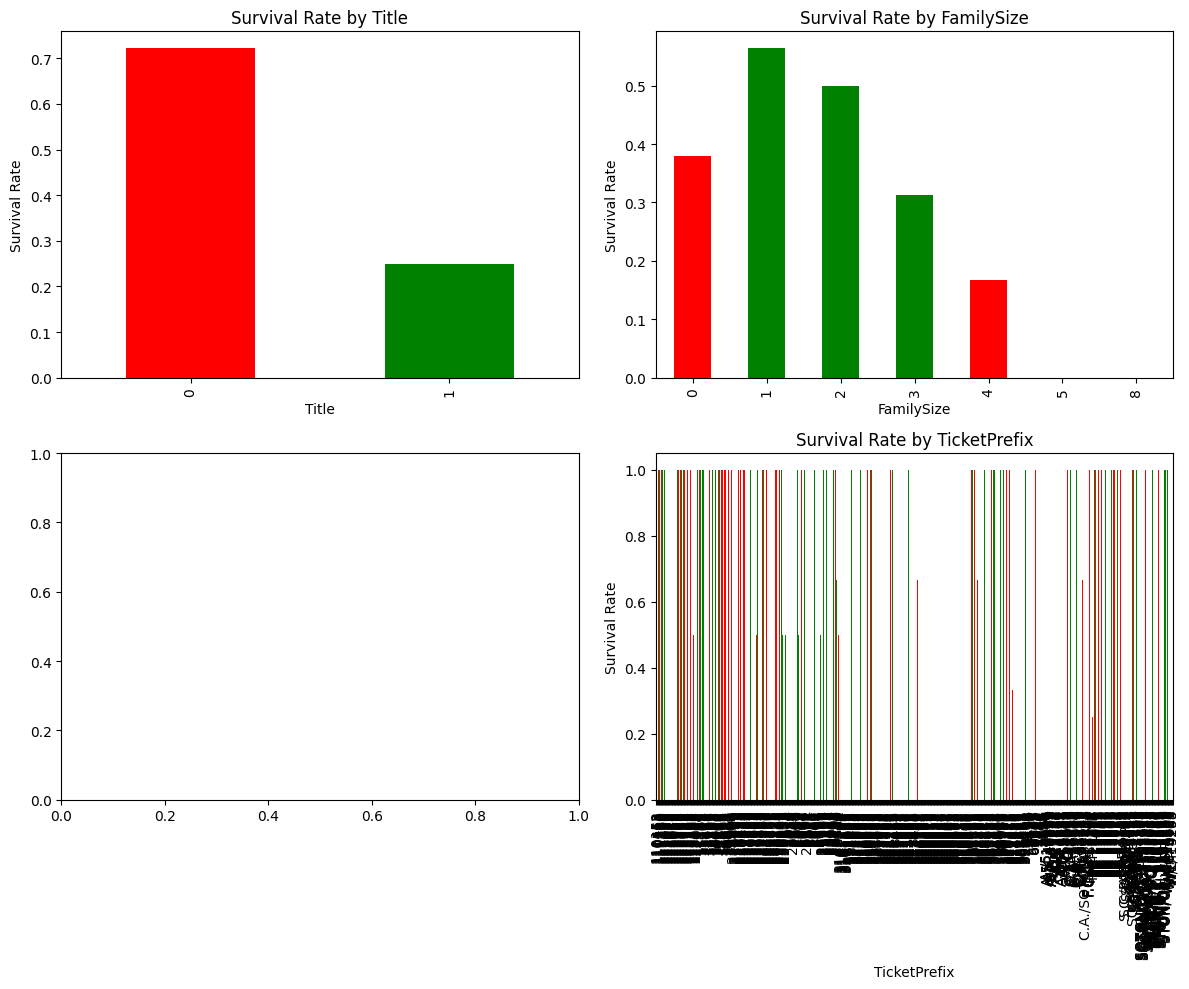


DataFrame after standardization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,0,A/5 21171,-0.502445,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,0.432793,0,PC 17599,0.786845,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,0,STON/O2. 3101282,-0.488854,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,0,373450,-0.486337,Unknown,2


In [7]:
from sklearn.preprocessing import StandardScaler
# Define color map (0 for red, 1 for green)
color_map = {0: 'red', 1: 'green'}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot survival rate by Title
df_train.groupby('Sex')['Survived'].mean().plot(kind='bar', color=df_train['Survived'].map(color_map), ax=axs[0, 0])
axs[0, 0].set_title('Survival Rate by Title')
axs[0, 0].set_xlabel('Title')
axs[0, 0].set_ylabel('Survival Rate')

# Plot survival rate by FamilySize
df_train.groupby('SibSp')['Survived'].mean().plot(kind='bar', color=df_train['Survived'].map(color_map), ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by FamilySize')
axs[0, 1].set_xlabel('FamilySize')
axs[0, 1].set_ylabel('Survival Rate')

# # Plot survival rate by IsAlone
# df_train.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color=df_train['Survived'].map(color_map), ax=axs[1, 0])
# axs[1, 0].set_title('Survival Rate by IsAlone')
# axs[1, 0].set_xlabel('IsAlone')
# axs[1, 0].set_ylabel('Survival Rate')

# Plot survival rate by TicketPrefix
df_train.groupby('Ticket')['Survived'].mean().plot(kind='bar', color=df_train['Survived'].map(color_map), ax=axs[1, 1])
axs[1, 1].set_title('Survival Rate by TicketPrefix')
axs[1, 1].set_xlabel('TicketPrefix')
axs[1, 1].set_ylabel('Survival Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# Select numerical features for standardization
numerical_features = ['Age', 'Fare', 'SibSp']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply standardization
df_train_standard_scaled = df_train.copy()
df_train_standard_scaled[numerical_features] = standard_scaler.fit_transform(df_train_standard_scaled[numerical_features])

# Check the dataframe after standardization
print("\nDataFrame after standardization:")
df_train_standard_scaled.head()

Model Evaluation Metrics:
Accuracy     : 0.7486
Precision    : 0.8000
Recall       : 0.5333
F1-Score     : 0.6400
ROC-AUC      : 0.7944


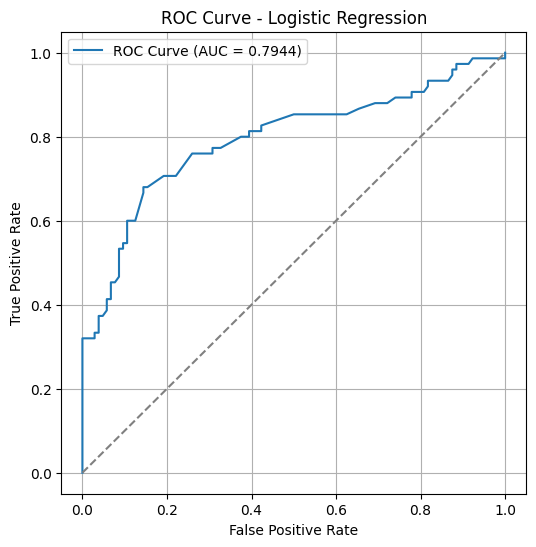

In [8]:
#Evaluation
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# -------------------
# Train/Test Split
# -------------------
X = df_train[['Pclass', 'SibSp', 'Parch', 'Fare']]  # predictors
y = df_train['Survived']                            # target (categorical)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------
# Logistic Regression
# -------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -------------------
# Predictions
# -------------------
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# -------------------
# Metrics
# -------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")

# -------------------
# ROC Curve
# -------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import joblib

# After training your logistic regression model
joblib.dump(model, "logistic_model.pkl")
print("Model saved as logistic_model.pkl")


Model saved as logistic_model.pkl


In [11]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.9 MB/s eta 0:00:00


In [12]:
#deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("logistic_model.pkl")

st.set_page_config(page_title="Titanic Survival Prediction", layout="centered")

st.title("🚢 Titanic Survival Prediction")
st.write("Enter passenger details below to predict survival.")

# Sidebar for user inputs
st.sidebar.header("Passenger Features")

def user_input_features():
    Pclass = st.sidebar.selectbox("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)", [1, 2, 3])
    SibSp = st.sidebar.number_input("Number of Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
    Parch = st.sidebar.number_input("Number of Parents/Children Aboard", min_value=0, max_value=10, value=0)
    Fare = st.sidebar.number_input("Ticket Fare", min_value=0.0, value=32.2)

    data = {"Pclass": Pclass, "SibSp": SibSp, "Parch": Parch, "Fare": Fare}
    return pd.DataFrame([data])

input_df = user_input_features()

# Prediction
if st.button("Predict Survival"):
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0][1]

    st.subheader("Prediction Result:")
    if prediction == 1:
        st.success(f"✅ Passenger Survived (Probability: {prediction_proba:.2f})")
    else:
        st.error(f"❌ Passenger Did Not Survive (Probability: {prediction_proba:.2f})")


2025-09-06 01:02:10.180 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-06 01:02:10.190 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-06 01:02:10.361 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-06 01:02:10.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-06 01:02:10.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-06 01:02:10.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-06 01:02:10.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn